## Leer archivos

In [112]:
import pandas as  pd

### Ordenando por el Id de venta y poninedo el id como el indice

In [113]:
df = pd.read_csv("ventas.csv", index_col=0)
df = df.sort_values("id_venta", ascending=True)
df

,datetime,id_producto,id_sucursal,unidades_vendidas
id_venta,,,,
1,25/03/2024 03:00,66.0,1.0,12
1,25/03/2024 03:00,66.0,1.0,12
2,28/02/2024 19:00,98.0,2.0,12
3,09/01/2024 19:00,87.0,3.0,17
4,29/02/2024 21:00,137.0,5.0,13
...,...,...,...,...
11996,06/03/2024 16:00,164.0,5.0,10
11997,31/01/2024 03:00,31.0,3.0,7
11998,22/03/2024 17:00,133.0,4.0,10


### eliminar duplicados, los id's, y nos quedamos con el primero, como es el indice se pone el siguiete comando

In [114]:
df = df[~df.index.duplicated(keep="first")]
df

,datetime,id_producto,id_sucursal,unidades_vendidas
id_venta,,,,
1,25/03/2024 03:00,66.0,1.0,12
2,28/02/2024 19:00,98.0,2.0,12
3,09/01/2024 19:00,87.0,3.0,17
4,29/02/2024 21:00,137.0,5.0,13
5,28/02/2024 03:00,151.0,6.0,12
...,...,...,...,...
11996,06/03/2024 16:00,164.0,5.0,10
11997,31/01/2024 03:00,31.0,3.0,7
11998,22/03/2024 17:00,133.0,4.0,10


si fuese otra seria algo como df_sin_duplicados = df.drop_duplicates(subset='id', keep='first')


In [115]:
# Ver filas con campos vacios
df[df.isnull().any(axis=1)]


,datetime,id_producto,id_sucursal,unidades_vendidas
id_venta,,,,
24,30/01/2024 09:00,NaN,1.0,19
33,10/02/2024 15:00,175.0,NaN,doce
74,01/01/2024 07:00,NaN,1.0,12
291,10/03/2024 19:00,21.0,NaN,18
297,02/02/2024 03:00,160.0,NaN,17
...,...,...,...,...
11714,05/03/2024 15:00,31.0,NaN,15
11729,30/03/2024 16:00,NaN,5.0,17
11809,22/01/2024 04:00,NaN,3.0,4


### Decidimos que hacer, son 247 datos con algun campo vacio, no es ni el 3% de los datos totales, asi que vamos a deshacernos de ellos

In [116]:
df = df[df.notna().all(axis=1)]
df

,datetime,id_producto,id_sucursal,unidades_vendidas
id_venta,,,,
1,25/03/2024 03:00,66.0,1.0,12
2,28/02/2024 19:00,98.0,2.0,12
3,09/01/2024 19:00,87.0,3.0,17
4,29/02/2024 21:00,137.0,5.0,13
5,28/02/2024 03:00,151.0,6.0,12
...,...,...,...,...
11996,06/03/2024 16:00,164.0,5.0,10
11997,31/01/2024 03:00,31.0,3.0,7
11998,22/03/2024 17:00,133.0,4.0,10


### Cambiar tipo de datos a int a los valores enteros

In [117]:
df["id_sucursal"]=df["id_sucursal"].astype("int64")
df["id_producto"]=df["id_producto"].astype("int64")
df

C:\Users\mario\AppData\Local\Temp\ipykernel_22480\3261255972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id_sucursal"]=df["id_sucursal"].astype("int64")
C:\Users\mario\AppData\Local\Temp\ipykernel_22480\3261255972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id_producto"]=df["id_producto"].astype("int64")


,datetime,id_producto,id_sucursal,unidades_vendidas
id_venta,,,,
1,25/03/2024 03:00,66,1,12
2,28/02/2024 19:00,98,2,12
3,09/01/2024 19:00,87,3,17
4,29/02/2024 21:00,137,5,13
5,28/02/2024 03:00,151,6,12
...,...,...,...,...
11996,06/03/2024 16:00,164,5,10
11997,31/01/2024 03:00,31,3,7
11998,22/03/2024 17:00,133,4,10


### Creamos la fila de venta total
Para esto necesitamos el archivo de productos, y haremos un join (merge) para quedarnos con el precio del producto

corroboramos que no tenga datos vacios

In [118]:
dfProducto= pd.read_csv("productos.csv")


dfProducto[dfProducto.isna().any(axis=1)]


,id_producto,nombre_producto,precio_producto,categoria


### Parece ser que todo esta bien, asi que haremos el Merge con los datos de los precio

In [119]:
#nuevo dataframe con el precio
dfConPrecio = pd.merge(df, dfProducto[["precio_producto", "id_producto"]], on="id_producto")
dfConPrecio2=dfConPrecio#un backup


In [120]:
dfConPrecio2["Venta total"] = dfConPrecio2["precio_producto"]* dfConPrecio2["unidades_vendidas"]



TypeError: can't multiply sequence by non-int of type 'float'

## Parece que hay un problema
Es porque en la columna de "unidades_vendidas" no todos los datos son numericos, hagmoslos numericos

In [122]:
#una copia de la columan para saber que no son numéros
dfConPrecio2["unidades_vendidas2"]=dfConPrecio2["unidades_vendidas"]
dfConPrecio2

,datetime,id_producto,id_sucursal,unidades_vendidas,precio_producto,unidades_vendidas2
0,25/03/2024 03:00,66,1,12,6.35,12
1,28/02/2024 19:00,98,2,12,42.93,12
2,09/01/2024 19:00,87,3,17,33.11,17
3,29/02/2024 21:00,137,5,13,42.54,13
4,28/02/2024 03:00,151,6,12,47.00,12
...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,5,10,13.29,10
11749,31/01/2024 03:00,31,3,7,36.99,7
11750,22/03/2024 17:00,133,4,10,43.97,10
11751,07/02/2024 16:00,70,2,18,10.27,18


## Convertimos la columna original a numero y lo que no sea numero se pondra como nan, osea not a number

In [ ]:

dfConPrecio2["unidades_vendidas"] = pd.to_numeric(dfConPrecio2["unidades_vendidas"],errors="coerce")
dfConPrecio2[dfConPrecio2["unidades_vendidas"].isna()]

,datetime,id_producto,id_sucursal,unidades_vendidas,precio_producto,unidades_vendidas2
44,03/02/2024 00:00,7,5,NaN,44.48,doce
91,24/03/2024 01:00,192,4,NaN,48.28,doce
175,05/02/2024 11:00,170,3,NaN,23.39,doce
233,08/02/2024 09:00,145,3,NaN,10.82,doce
456,16/01/2024 01:00,49,1,NaN,45.69,doce
...,...,...,...,...,...,...
11373,01/01/2024 17:00,99,2,NaN,27.65,doce
11426,12/02/2024 01:00,36,6,NaN,9.42,doce
11542,29/01/2024 21:00,152,3,NaN,9.87,doce
11609,16/02/2024 05:00,191,2,NaN,37.99,doce


## Columna original y copia como filtroa
Asi podemos colocar que lo que sea "nan" en la columna original y "doce" (es el que se ve) en la columna copia, sean los datos a corregir, entonces convertimos esos datos simplemente dandoles un "="

In [124]:
#El filtro para econtrar los datos donde sean nan en la original y "doce" en la copia 
mask=(dfConPrecio2["unidades_vendidas"].isna()) & (dfConPrecio2["unidades_vendidas2"]=="doce")
dfConPrecio2.loc[mask, "unidades_vendidas"] = 12
dfConPrecio2

,datetime,id_producto,id_sucursal,unidades_vendidas,precio_producto,unidades_vendidas2
0,25/03/2024 03:00,66,1,12.0,6.35,12
1,28/02/2024 19:00,98,2,12.0,42.93,12
2,09/01/2024 19:00,87,3,17.0,33.11,17
3,29/02/2024 21:00,137,5,13.0,42.54,13
4,28/02/2024 03:00,151,6,12.0,47.00,12
...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,5,10.0,13.29,10
11749,31/01/2024 03:00,31,3,7.0,36.99,7
11750,22/03/2024 17:00,133,4,10.0,43.97,10
11751,07/02/2024 16:00,70,2,18.0,10.27,18


## Trasnformamos a int la columna de "unidades_vendidas"

In [125]:
dfConPrecio2["unidades_vendidas"] = dfConPrecio2["unidades_vendidas"].fillna(0).astype("int16")

dfConPrecio2["unidades_vendidas"].describe()
#ya no nos tirará error


count    11753.000000
mean        10.096401
std          5.476136
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: unidades_vendidas, dtype: float64

Ya estan todos en el formato correcto, ahora sacaremos la venta total por transaccion y redondearla a 2 decimales


In [ ]:
dfConPrecio2["precio_producto"]=dfConPrecio2["precio_producto"].astype("float")


In [133]:
dfConPrecio2["venta_total"] = (dfConPrecio2["precio_producto"] * dfConPrecio2["unidades_vendidas"]).round(2)
dfConPrecio2 

,datetime,id_producto,id_sucursal,unidades_vendidas,precio_producto,venta_total
0,25/03/2024 03:00,66,1,12,6.35,76.20
1,28/02/2024 19:00,98,2,12,42.93,515.16
2,09/01/2024 19:00,87,3,17,33.11,562.87
3,29/02/2024 21:00,137,5,13,42.54,553.02
4,28/02/2024 03:00,151,6,12,47.00,564.00
...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,5,10,13.29,132.90
11749,31/01/2024 03:00,31,3,7,36.99,258.93
11750,22/03/2024 17:00,133,4,10,43.97,439.70
11751,07/02/2024 16:00,70,2,18,10.27,184.86


## Con esta limpieza y combinacion con otra tabla, podemos trabajar ahora haciendo hallazgos de este trimestre
Lo que podemos hacer es saber que producto se vende mas, las ventas por sucursales y meses, las ventas totales, etc. podemos utilizar alguna herramienta de Business intelligence o seguir usando python con matplotlib/seaborn, optaré por utilizar Power Bi, para que las ventas sean mas interactivas, asi que primero exportaremos nuestro archivo limpio ya con el precio, pero antes borraremos la columna de unidades_vendidas2, que fue nuestro auxiliar

In [134]:
del dfConPrecio2["unidades_vendidas2"]


KeyError: 'unidades_vendidas2'

## Exportamos el archivo a formato csv

In [135]:
dfConPrecio2.to_csv("ventasLimpiarConPrecio.csv")


## Pivot Table 
Para no quedarnos con la duda ver las ventas por sucursal y meses, vamos a hacer un breve grafico y hacer otro merge con nuestro archivo de sucursales

Crearemos una tabla dinamica para ver de que sucursales son cada una de las ventas

In [ ]:
sucursales = pd.read_csv("sucursales.csv",encoding="latin1") # es necesario colocar la codificacion, ya que daba un error anteriormnete
sucursales


,id_sucursal,nombre_sucursal,Ubicación,id_gerente
0,1,Sucursal Andipos,"Avenida Mileod 123, Colonia Altavista, Ciudad ...",108
1,2,Sucursal Bellane,"Calle Jazmin 45, Barrio Lirio, Ciudad Bruma",41
2,3,Sucursal Lumira,"Boulevard Estrella 202, Zona Aurora, Ciudad Bruma",2
3,4,Sucursal Rosarela,"Pasaje Rubi 9, Distrito Centro, Ciudad Bruma",12
4,5,Sucursal Elanova,"Calle Horizonte 88, Sector Miraluz, Ciudad Bruma",113
5,6,Sucursal Senzoria,"Camino Ambar 314, Parque Sur, Ciudad Bruma",3


## Haremos un nuevo Dataframe ahora con las sucursales unidas, para saber de donde es cada venta

In [137]:
dfConSucursal= pd.merge(dfConPrecio2,sucursales[["nombre_sucursal","id_sucursal"]], on="id_sucursal")
dfConSucursal

,datetime,id_producto,id_sucursal,unidades_vendidas,precio_producto,venta_total,nombre_sucursal
0,25/03/2024 03:00,66,1,12,6.35,76.20,Sucursal Andipos
1,28/02/2024 19:00,98,2,12,42.93,515.16,Sucursal Bellane
2,09/01/2024 19:00,87,3,17,33.11,562.87,Sucursal Lumira
3,29/02/2024 21:00,137,5,13,42.54,553.02,Sucursal Elanova
4,28/02/2024 03:00,151,6,12,47.00,564.00,Sucursal Senzoria
...,...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,5,10,13.29,132.90,Sucursal Elanova
11749,31/01/2024 03:00,31,3,7,36.99,258.93,Sucursal Lumira
11750,22/03/2024 17:00,133,4,10,43.97,439.70,Sucursal Rosarela
11751,07/02/2024 16:00,70,2,18,10.27,184.86,Sucursal Bellane


## Eliminamos la columna "id_sucursal para que no sea redundante"

In [138]:
del dfConSucursal["id_sucursal"]
dfConSucursal

,datetime,id_producto,unidades_vendidas,precio_producto,venta_total,nombre_sucursal
0,25/03/2024 03:00,66,12,6.35,76.20,Sucursal Andipos
1,28/02/2024 19:00,98,12,42.93,515.16,Sucursal Bellane
2,09/01/2024 19:00,87,17,33.11,562.87,Sucursal Lumira
3,29/02/2024 21:00,137,13,42.54,553.02,Sucursal Elanova
4,28/02/2024 03:00,151,12,47.00,564.00,Sucursal Senzoria
...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,10,13.29,132.90,Sucursal Elanova
11749,31/01/2024 03:00,31,7,36.99,258.93,Sucursal Lumira
11750,22/03/2024 17:00,133,10,43.97,439.70,Sucursal Rosarela
11751,07/02/2024 16:00,70,18,10.27,184.86,Sucursal Bellane


## Ahora sacaremos para ver de que mes corresponde cada venta

In [139]:
dfConmeses= dfConSucursal.copy() #copiamos el df para tenerlo seguro
dfConmeses["Mes"] = pd.to_datetime(dfConmeses["datetime"]).dt.month
dfConmeses

C:\Users\mario\AppData\Local\Temp\ipykernel_22480\1059093149.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfConmeses["Mes"] = pd.to_datetime(dfConmeses["datetime"]).dt.month


,datetime,id_producto,unidades_vendidas,precio_producto,venta_total,nombre_sucursal,Mes
0,25/03/2024 03:00,66,12,6.35,76.20,Sucursal Andipos,3
1,28/02/2024 19:00,98,12,42.93,515.16,Sucursal Bellane,2
2,09/01/2024 19:00,87,17,33.11,562.87,Sucursal Lumira,1
3,29/02/2024 21:00,137,13,42.54,553.02,Sucursal Elanova,2
4,28/02/2024 03:00,151,12,47.00,564.00,Sucursal Senzoria,2
...,...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,10,13.29,132.90,Sucursal Elanova,3
11749,31/01/2024 03:00,31,7,36.99,258.93,Sucursal Lumira,1
11750,22/03/2024 17:00,133,10,43.97,439.70,Sucursal Rosarela,3
11751,07/02/2024 16:00,70,18,10.27,184.86,Sucursal Bellane,2


## Ya tenemos los meses, pero... estan como numero, transformemoslos a palabras

In [141]:
dfConmeses["Mes"].replace({
    1:"Enero",
    2:"Febrero",
    3:"Marzo",
    4:"Abril",
}, inplace=True)
dfConmeses


,datetime,id_producto,unidades_vendidas,precio_producto,venta_total,nombre_sucursal,Mes
0,25/03/2024 03:00,66,12,6.35,76.20,Sucursal Andipos,Marzo
1,28/02/2024 19:00,98,12,42.93,515.16,Sucursal Bellane,Febrero
2,09/01/2024 19:00,87,17,33.11,562.87,Sucursal Lumira,Enero
3,29/02/2024 21:00,137,13,42.54,553.02,Sucursal Elanova,Febrero
4,28/02/2024 03:00,151,12,47.00,564.00,Sucursal Senzoria,Febrero
...,...,...,...,...,...,...,...
11748,06/03/2024 16:00,164,10,13.29,132.90,Sucursal Elanova,Marzo
11749,31/01/2024 03:00,31,7,36.99,258.93,Sucursal Lumira,Enero
11750,22/03/2024 17:00,133,10,43.97,439.70,Sucursal Rosarela,Marzo
11751,07/02/2024 16:00,70,18,10.27,184.86,Sucursal Bellane,Febrero


## Ahora haremos la pivot table (Tabla dinamica) para saber las ventas por sucursal y los meses

In [142]:
pivot_ventas_porMesYSucursal = pd.pivot_table(dfConmeses, index=["nombre_sucursal", "Mes"],values="venta_total", aggfunc="sum")
pivot_ventas_porMesYSucursal


venta_total
nombre_sucursal   Mes                 
Sucursal Andipos  Enero      203723.19
                  Febrero    166885.30
                  Marzo      189169.35
Sucursal Bellane  Enero      183359.56
                  Febrero    177926.00
                  Marzo      180224.22
Sucursal Elanova  Enero      189324.99
                  Febrero    175410.67
                  Marzo      180467.84
Sucursal Lumira   Enero      191300.47
                  Febrero    200827.53
                  Marzo      181483.99
Sucursal Rosarela Enero      196017.00
                  Febrero    172105.55
                  Marzo      171989.73
Sucursal Senzoria Enero      186175.99
                  Febrero    186688.80
                  Marzo      210825.09

## Visualizacion
Ahora haremos un peqeueño grafico de barras, pero para eso necesitamos resetear los index de nuestra tabla dinamica, para que detecte las sucursales en cada renglo

In [143]:
import matplotlib.pyplot as plt

# Reiniciar el índice para poder trabajar con columnas fácilmente
pivot_df = pivot_ventas_porMesYSucursal.reset_index()
pivot_df

,nombre_sucursal,Mes,venta_total
0,Sucursal Andipos,Enero,203723.19
1,Sucursal Andipos,Febrero,166885.30
2,Sucursal Andipos,Marzo,189169.35
3,Sucursal Bellane,Enero,183359.56
4,Sucursal Bellane,Febrero,177926.00
5,Sucursal Bellane,Marzo,180224.22
6,Sucursal Elanova,Enero,189324.99
7,Sucursal Elanova,Febrero,175410.67
8,Sucursal Elanova,Marzo,180467.84
9,Sucursal Lumira,Enero,191300.47


## Usamos las librerias anteriormente mencionadas para generar un grafico con los datos de nuestra tabla dinamica

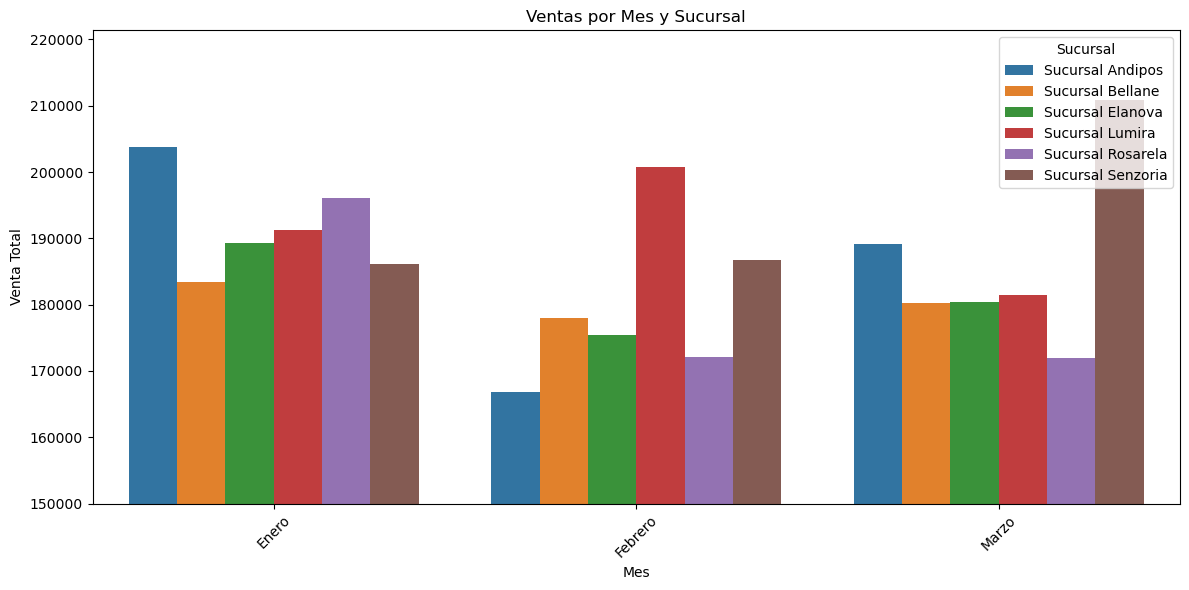

In [146]:

import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener el DataFrame listo
pivot_df = pivot_ventas_porMesYSucursal.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_df, x="Mes", y="venta_total", hue="nombre_sucursal")
plt.ylim(bottom=150000)
plt.title("Ventas por Mes y Sucursal")
plt.xlabel("Mes")
plt.ylabel("Venta Total")
plt.xticks(rotation=45)
plt.legend(title="Sucursal")
plt.tight_layout()
plt.show()


## Ahora que tenemos los datos listos para mostrar nuestros graficos, iremos a Power Bi para Continuar